In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from prettytable import PrettyTable

In [2]:
#Reading the dataset
df=pd.read_csv('data.csv',encoding='unicode_escape')

# Data Understanding


In [3]:
#Loading the dataset
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.shape
# As we can see that there are 45742 rows and 13 columns in the dataset

(435742, 13)

In [5]:
# Checking the overall information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
# Checking the descriptive stats of the numeric values present in the data like mean,standard deviation,min values and max values present in the data.
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [8]:
# These are all the unique values present in the dataframe
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [9]:
df.columns
# These are all columns present in the dataset

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code - station code  
sampling_date - date of sample collection  
state  
location - location of sample collection  
agency  
type  
so2 - sulphur dioxide concentration  
no2 - nitrogen dioxide concentration  
rspm - respirable suspended particulate matter concentration  
spm - suspended particulate matter concentration  
location_monitoring_station  
pm2_5 - partculate matter 2.5  
date


# Data Visualization


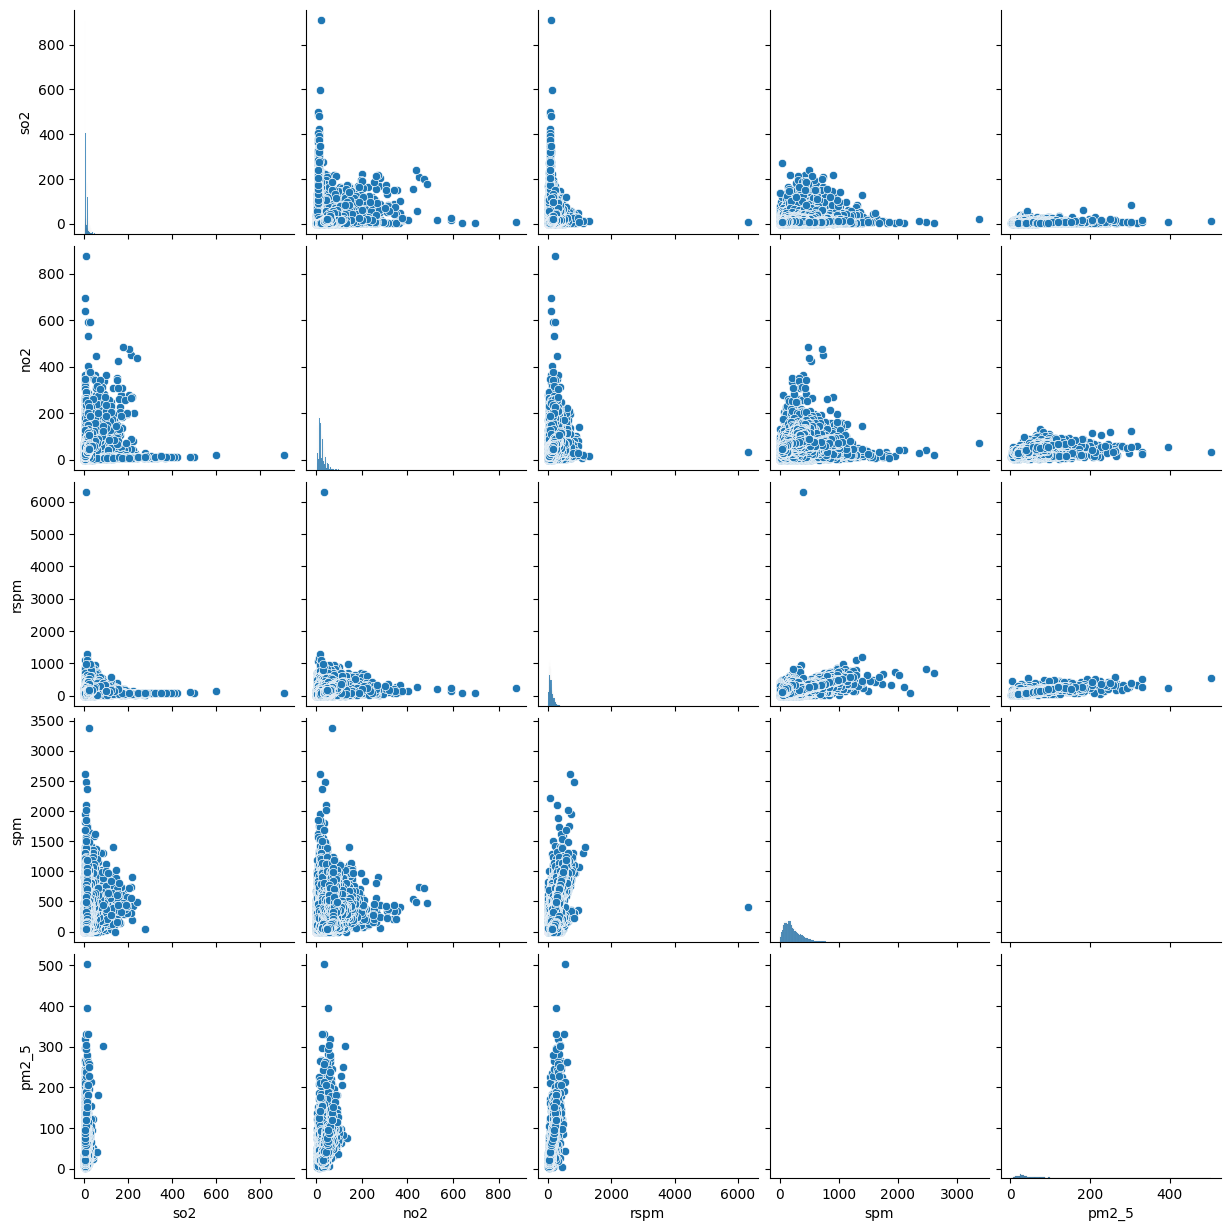

In [10]:
sns.pairplot(data=df)

In [11]:
df['state'].value_counts()
# viewing the count of values present in state column

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

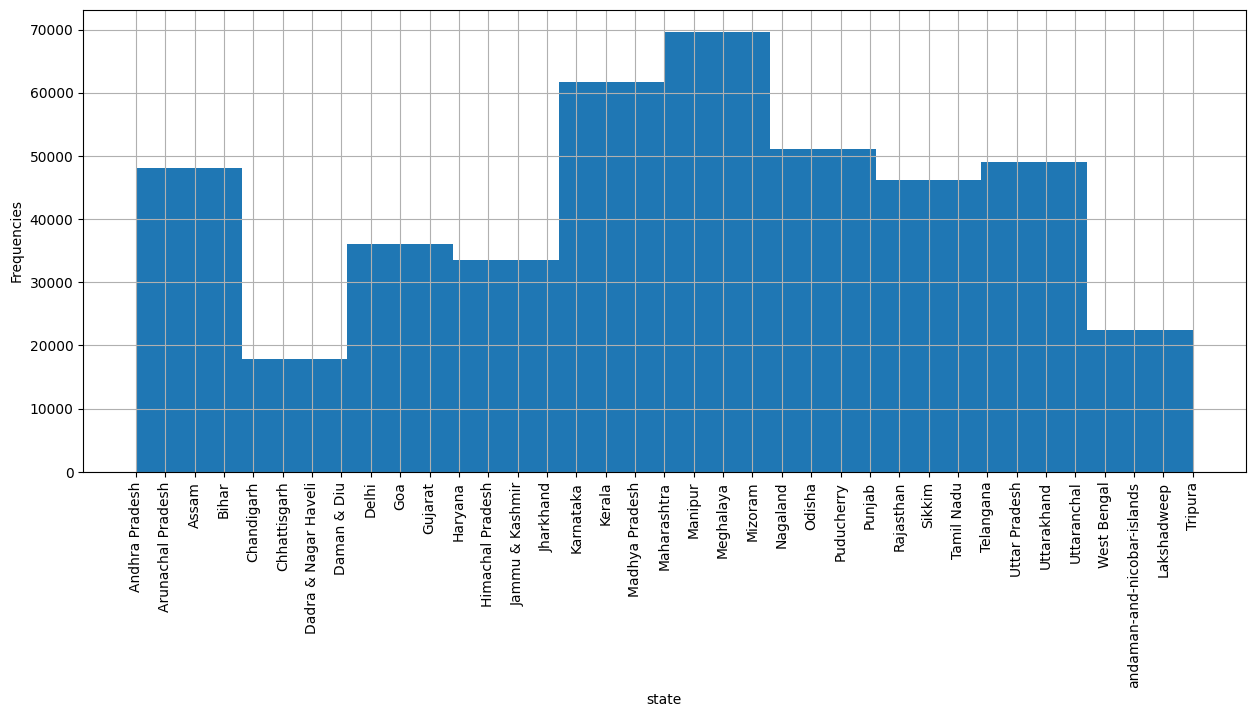

In [12]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [13]:
df['type'].value_counts()
# viewing the count of values present in type column

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

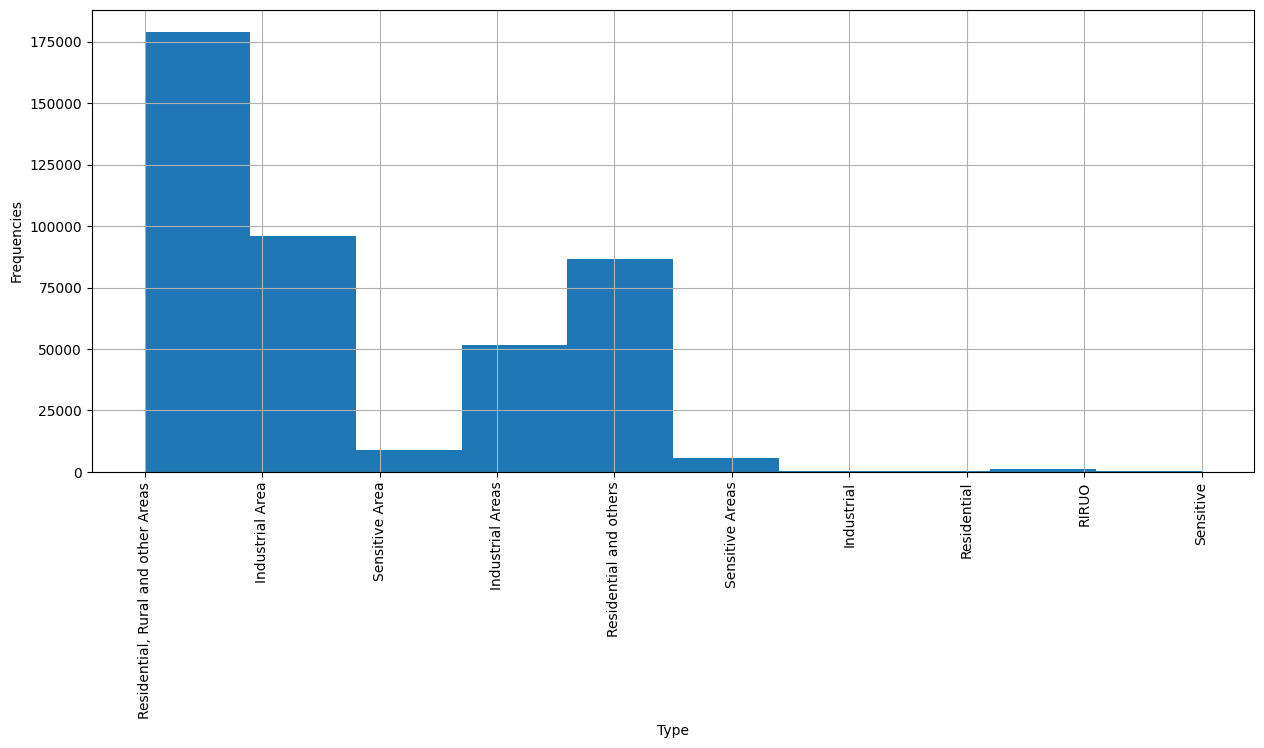

In [14]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of types present in the dataset.

In [15]:
df['agency'].value_counts()
# viewing the count of values present in agency column

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

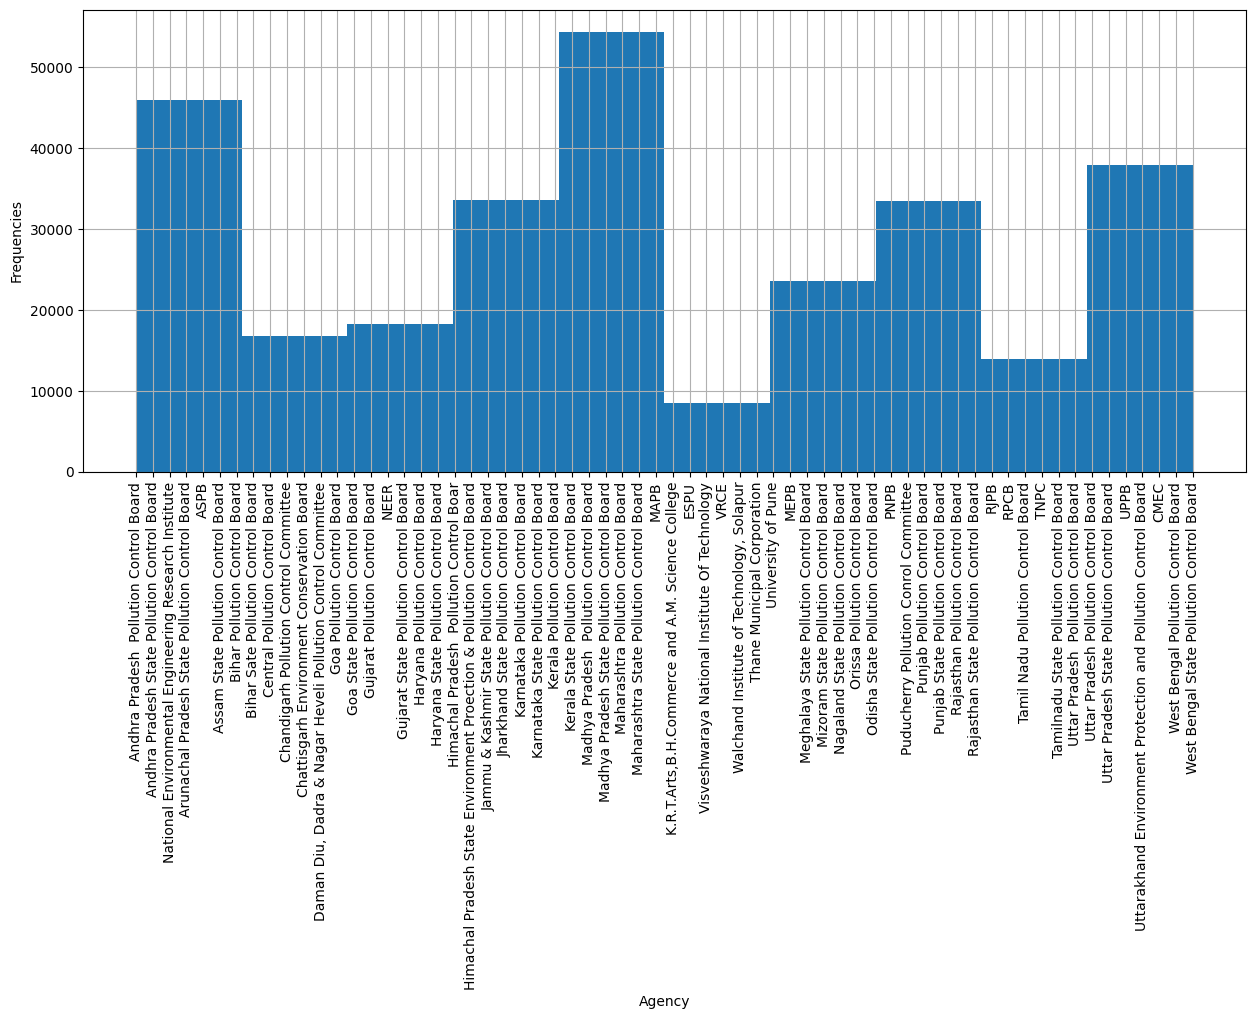

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of agency present in the dataset.

<Axes: xlabel='state', ylabel='so2'>

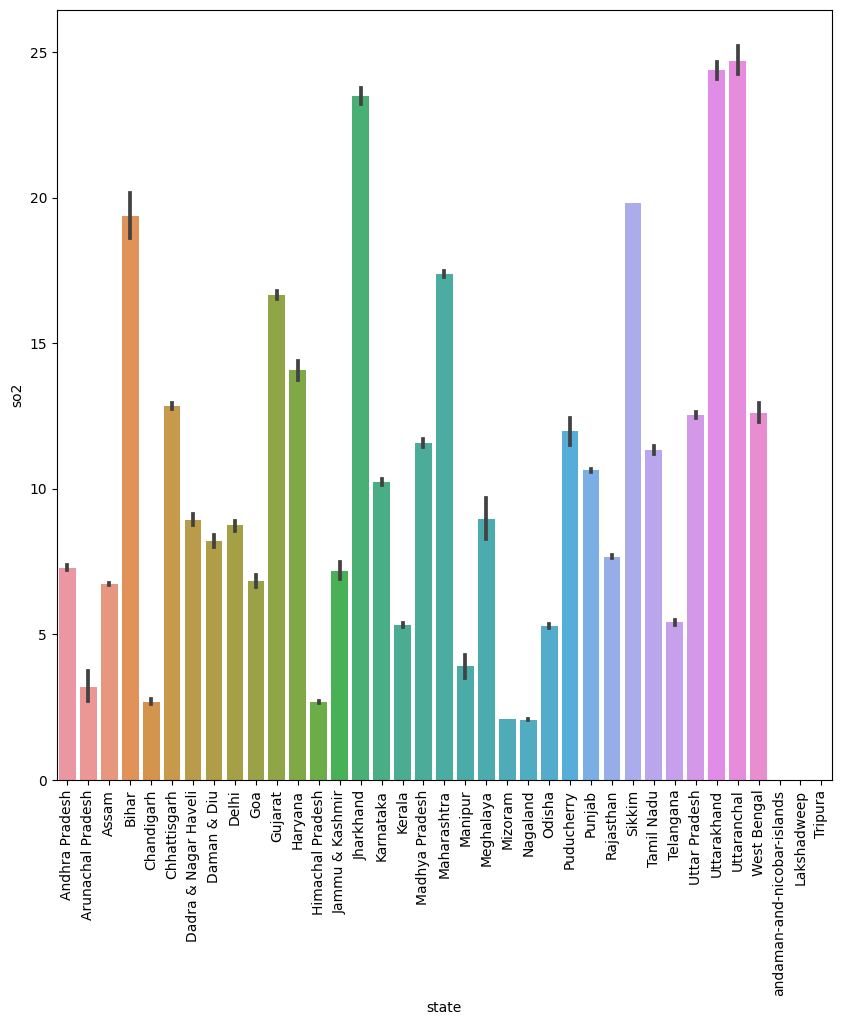

In [17]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)
# This visualization shows the name of the state having higher so2 levels in the air.

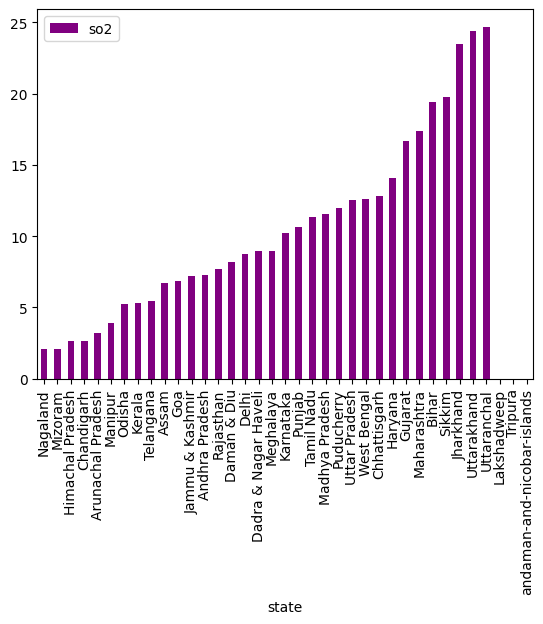

In [18]:
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# sorting states in increasing value of so2

<Axes: xlabel='state', ylabel='no2'>

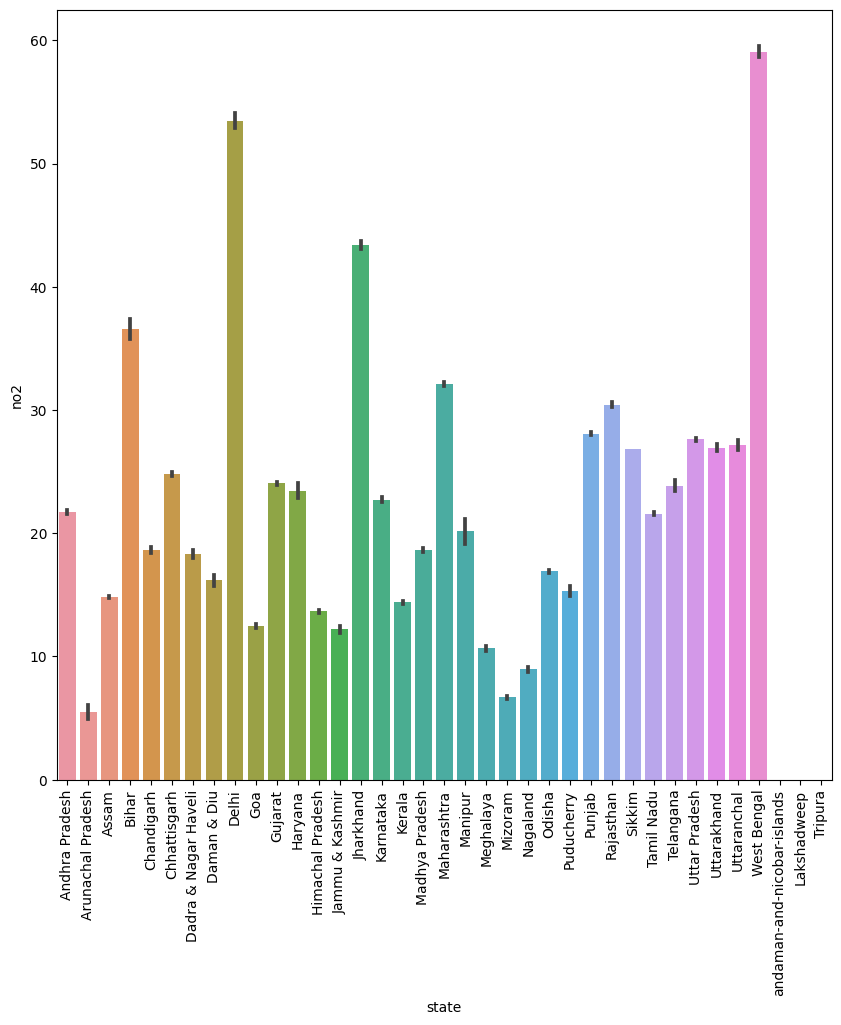

In [19]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)
# This visualization shows the name of the state having higher no2 levels in the air.

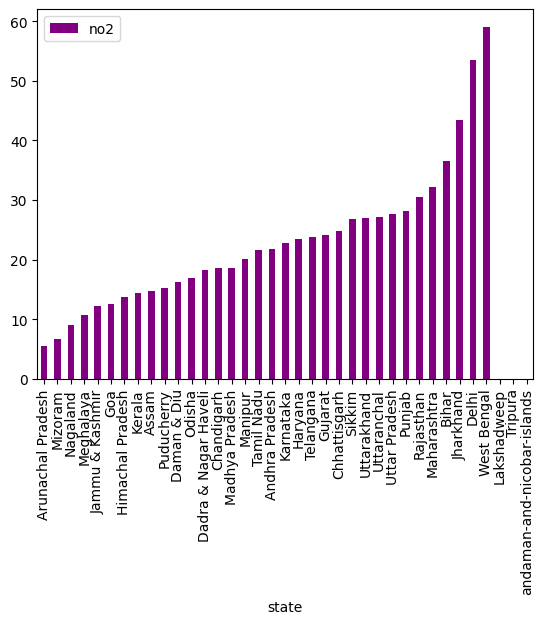

In [20]:
df[['no2','state']].groupby(['state']).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# sorting states in increasing value of so2

<Axes: xlabel='state', ylabel='rspm'>

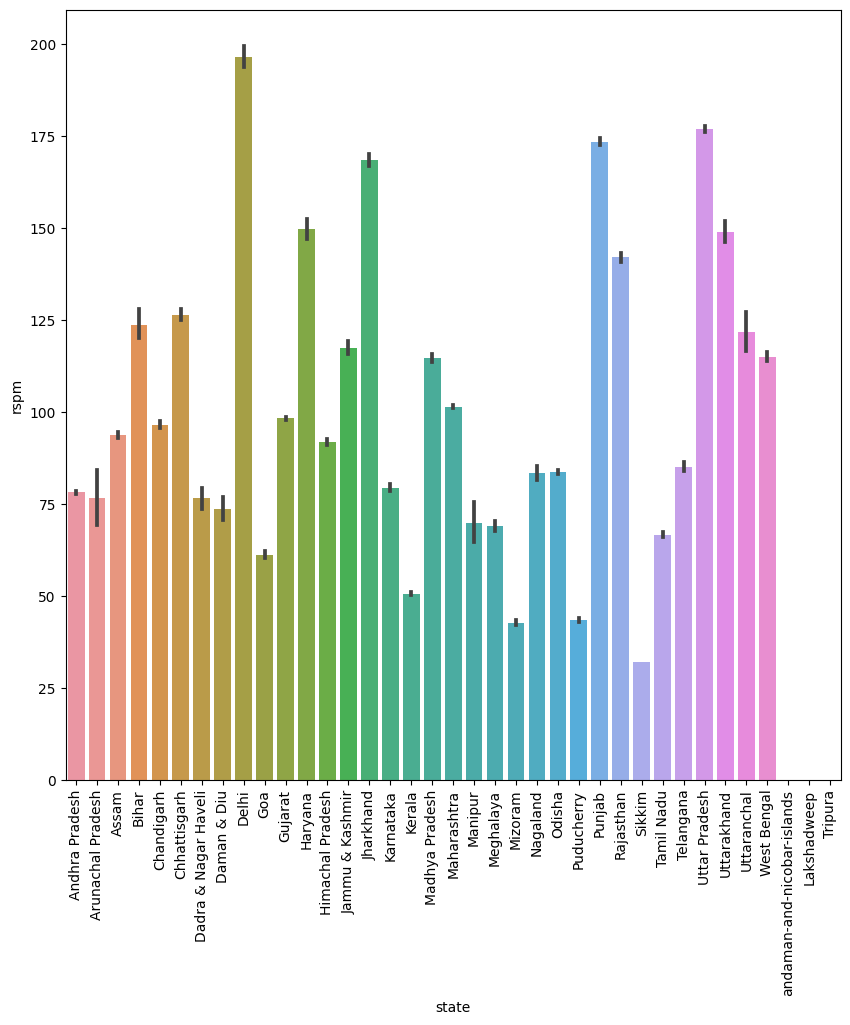

In [21]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)
# This visualization shows the name of the state having higher rspm levels in the air.

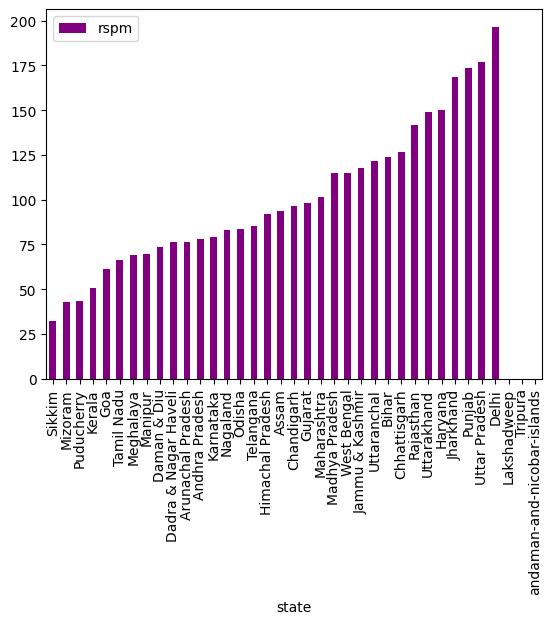

In [22]:
df[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm').plot.bar(color='purple')
plt.show()
# sorting states in increasing value of so2

<Axes: xlabel='state', ylabel='spm'>

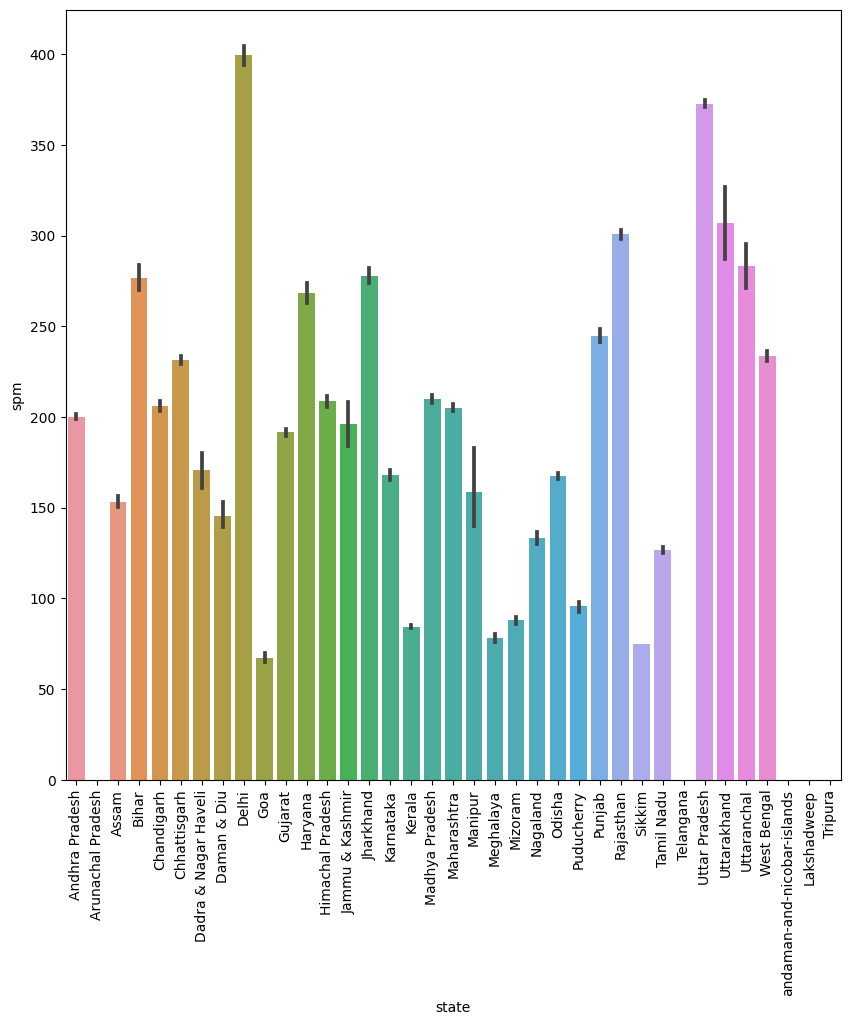

In [23]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)
# This visualization shows the name of the state having higher spm levels in the air.

<Axes: xlabel='state', ylabel='pm2_5'>

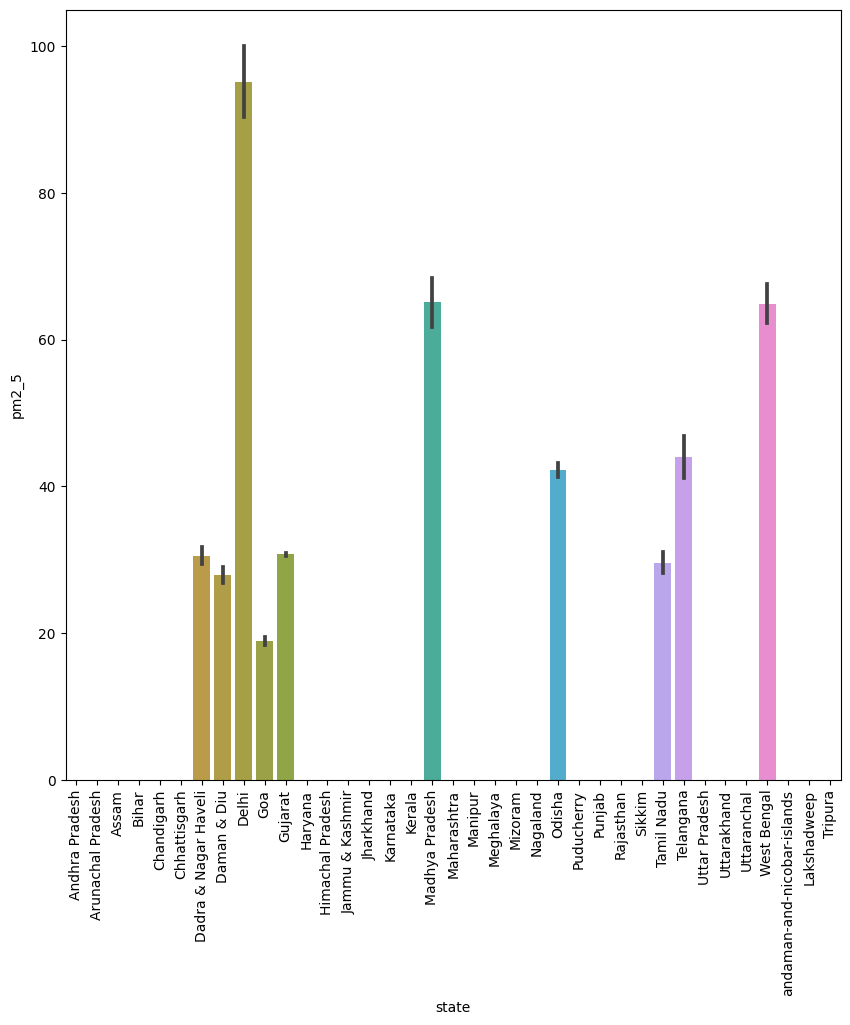

In [24]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df)
# This visualization shows the name of the state having higher pm2_5 levels in the air.

# Checking all nullvalues and treating those null values

In [25]:
# Checking all null values
nullvalues=df.isnull().sum().sort_values(ascending=False)

In [26]:
nullvalues
# Higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [27]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending= False)
# Count (returns non-NAN value)

In [28]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percentage'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [29]:
missing_data_with_percentage
# Percentage of null values present in the dataset

,Total,Percentage
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [30]:
# Dropping unnecessary columns
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [31]:
# Now checking the null values
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [32]:
df # after dropping columns

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# null value imputation for catagorical data
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [34]:
# null values are replaced with zeros for the numerical data
df.fillna(0, inplace=True)

In [35]:
# now we have successfully imputed null values which were present in the dataset
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [36]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


# Calculate AQI for so2 based on formula
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used.

Function to calculate so2 individual pollutant index(si)

In [37]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si=so2*(50/40)
    elif(so2>40 and so2<=80):
        si=50+(so2-40)*(50/40)
    elif(so2>80 and so2<=380):
        si=100+(so2-80)*(100/300)
    elif(so2>380 and so2<=800):
        si=200+(so2-380)*(100/420)
    elif(so2>800 and so2<1600):
        si=300+(so2-800)*(100/800)
    elif(so2>1600):
        si=400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(Sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


Function to calculate no2 individual pollutant index(ni)

In [38]:
def cal_NOi(no2):
    ni=0
    if (no2<=40):
        ni=no2*(50/40)
    elif(no2>40 and no2<=80):
        ni=50+(no2-40)*(50/40)
    elif(no2>80 and no2<=380):
        ni=100+(no2-80)*(100/300)
    elif(no2>380 and no2<=800):
        ni=200+(no2-380)*(100/420)
    elif(no2>800 and no2<1600):
        ni=300+(no2-800)*(100/800)
    elif(no2>1600):
        ni=400+(no2-1600)*(100/800)
    return ni
df['NOi']=df['no2'].apply(cal_NOi)
data= df[['no2','NOi']]
data.head()
# calculating the individual pollutant index for no2(Nitrogen dioxide)

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


Function to calculate rspm individual pollutant index(rpi)

In [39]:
def cal_RSPMI(rspm):
    rpi=0
    if (rpi<=30):
        rpi=rpi*50/30
    elif (rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*50/30
    elif (rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*100/30
    elif (rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*100/30
    elif (rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particulate matter)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to calculate spm individual pollutant index(spi)

In [40]:
def cal_SPMI(spm):
    spi=0
    if (spm<=50):
        spi=spm*50/50
    elif (spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif (spm>100 and spm<=250):
        spi=100+(spm-100)*(100/150)
    elif (spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)
    elif (spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
df['SPMI']=df['spm'].apply(cal_SPMI)
data= df[['spm','SPMI']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMI
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


Function to calculate the air quality index (AQI) of every data value

In [41]:
def cal_aqi(si,ni,rpi,spi):
    aqi=0
    if(si>ni and si>rpi and si>spi):
        aqi=si
    if(ni>si and ni>rpi and ni>spi):
        aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMI']),axis=1)
data= df[['state','SOi','NOi','Rpi','SPMI','AQI']]
data.head()
#Calculating the air quality index

,state,SOi,NOi,Rpi,SPMI,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [42]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range']=df['AQI'] .apply(AQI_Range)
df.head()
# using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,NOi,Rpi,SPMI,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [43]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column

AQI_Range
Good              219663
Poor               93454
Moderate           56571
Unhealthy          31572
Hazardous          18692
Very Unhealthy     15790
Name: count, dtype: int64

Splitting the dataset into Dependent and Independent columns

In [44]:
# we only select columns like soi, noi, rspi, spi
X=df[['SOi', 'NOi', 'Rpi', 'SPMI']]
Y=df['AQI']
X.head()

,SOi,NOi,Rpi,SPMI
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [45]:
# the AQI column is the target column
Y.head()

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [46]:
# Splitting the data into training and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


Random Forest Regressor

In [47]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [48]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting test
test_preds1=RF.predict(X_test)

In [49]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))

print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train,Y_train))
print('RSquared value on test:',RF.score(X_test,Y_test))

RMSE TrainingData =  0.41256944939271506
RMSE TestData =  0.989505688650243
--------------------------------------------------
RSquared value on train: 0.9999860947936968
RSquared value on test: 0.999919899450718


In [50]:
# Using a regression model to predict AQI value
predicted_aqi = RF.predict([[45,23.23,57,106]])
print("Predicted AQI:", predicted_aqi[0])

Predicted AQI: 106.0


In [52]:
print(AQI_Range(predicted_aqi))

Poor


In [53]:
import joblib
joblib.dump(RF,'RF_regression.pkl')

['RF_regression.pkl']